# 🚀 Day 8 Challenge: Mastering Data Analysis with Global Superstore Insights

##### 📂 Dataset: "https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting"

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [200]:
df = pd.read_csv("superstore_sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [201]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [202]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

# Pandas 

# Q1: Time-Series Analysis:
Resample the sales data to calculate the monthly total sales and average profit.

In [205]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')

In [206]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = 'mixed')

In [207]:
df['Order_month'] = df['Order Date'].dt.month

In [208]:
sales_by_month = df.groupby('Order_month')['Sales'].sum().reset_index(name = 'total_sales')
sales_by_month

,Order_month,total_sales
0,1,155990.9154
1,2,131153.2594
2,3,212256.1344
3,4,142984.2481
4,5,166000.7467
5,6,142034.7713
6,7,159472.5865
7,8,207601.7939
8,9,245155.0671
9,10,183851.9562


# Q2: Groupby with Aggregation:
Group the data by Category and Region, and calculate the total and average sales for each combination.

In [210]:
res = df.groupby(['Category', 'Region']).agg({'Sales': ['sum', 'mean']})
res.columns = ['Total_sales', 'Avg_sales']
res

Total_sales   Avg_sales
Category        Region                          
Furniture       Central  160317.4622  341.100983
                East     206461.3880  349.342450
                South    116531.4800  357.458528
                West     245348.2455  355.062584
Office Supplies Central  163590.2430  116.933698
                East     199940.8110  119.940499
                South    124424.7710  126.576573
                West     217466.5090  116.917478
Technology      Central  168739.2080  413.576490
                East     263116.5270  499.272347
                South    148195.2080  512.786187
                West     247404.9300  420.042326

# Q3: Pivot Table Analysis:
Create a pivot table showing the average sales per Segment for each Category.

In [212]:
avg_sale_category_segment = df.groupby(['Category', 'Segment'])['Sales'].mean().reset_index(name = 'avg_sales')
avg_sale_category_segment

,Category,Segment,avg_sales
0,Furniture,Consumer,354.708379
1,Furniture,Corporate,350.830735
2,Furniture,Home Office,337.928896
3,Office Supplies,Consumer,116.976760
4,Office Supplies,Corporate,125.704170
5,Office Supplies,Home Office,115.691831
6,Technology,Consumer,428.431266
7,Technology,Corporate,450.261692
8,Technology,Home Office,544.484690


In [213]:
avg_sale_pivot = df.pivot_table(values = 'Sales', index = 'Category', columns = 'Segment', aggfunc = 'mean')
avg_sale_pivot

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,354.708379,350.830735,337.928896
Office Supplies,116.976760,125.704170,115.691831
Technology,428.431266,450.261692,544.484690


# Visualization 

# Q1: Sales Trend Plot:
Create a line plot showing the trend of monthly sales over the years.

In [216]:
df['Year'] = df['Order Date'].dt.year

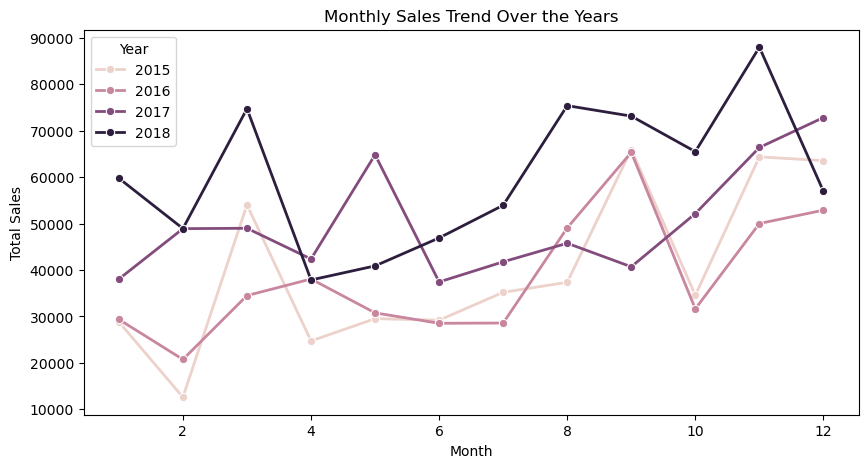

In [217]:
monthly_sales = df.groupby(['Year', 'Order_month'])['Sales'].sum().reset_index()

plt.figure(figsize = (10,5))
sns.lineplot(data = monthly_sales, x = 'Order_month', y = 'Sales', hue = 'Year', marker='o', linewidth=2)
plt.title('Monthly Sales Trend Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Q2: Sales Distribution by Region:
Create a bar plot showing the total sales for each region to identify the most profitable regions.

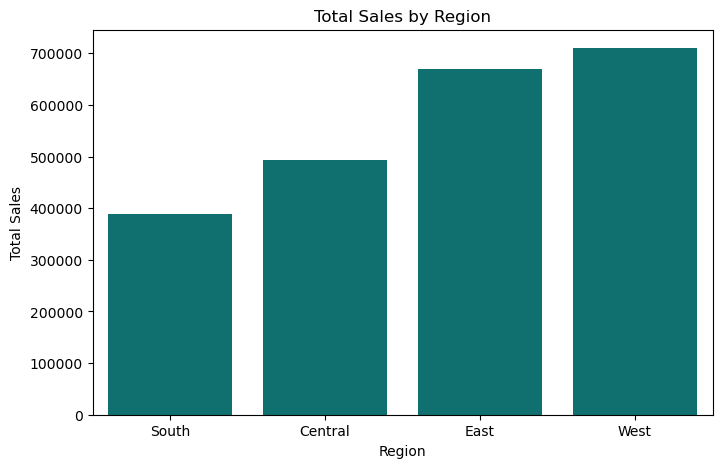

In [219]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending = True).reset_index(name = 'total_sales')
sales_by_region

plt.figure(figsize = (8,5))
sns.barplot(data = sales_by_region, x = 'Region', y = 'total_sales', color = 'teal')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# EDA 

# Q1: Missing Value Analysis:
Identify and visualize any missing data patterns in the dataset.

In [222]:
missing_data = df.isnull().sum()
missing_data

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order_month       0
Year              0
dtype: int64

# Q2: Outlier Analysis:
Use the IQR method to detect outliers in the Sales column and visualize the results using a box plot.

There are 1145 outliers present in Sales column.


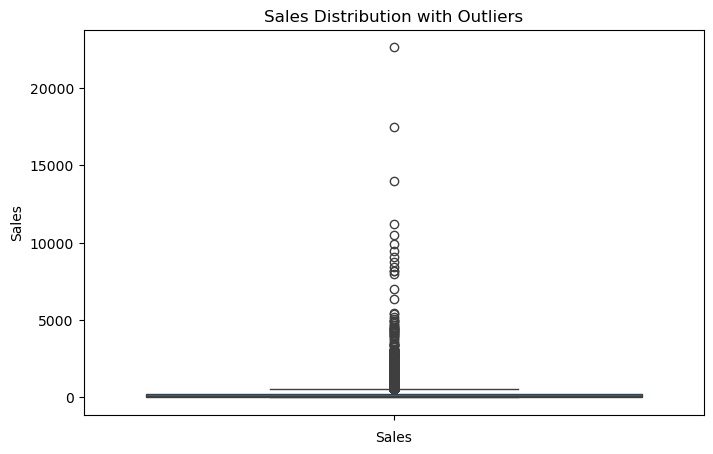

In [224]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR
outliers = (df['Sales'] > UW) | (df['Sales'] < LW)
print(f"There are {outliers.sum()} outliers present in Sales column.")

plt.figure(figsize = (8,5))
sns.boxplot(data = df['Sales'])
plt.title('Sales Distribution with Outliers')
plt.xlabel('Sales')
plt.show()

# Statistics 

# Q1: Categorical Analysis:
Conduct a chi-square test to determine whether there’s a relationship between Region and Segment.

In [227]:
contingency_data = pd.crosstab(df['Region'], df['Segment'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_data)

print("Contingency Table:")
print(contingency_data)
print("\nChi-Square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_data.index, columns=contingency_data.columns))

alpha = 0.05
if p_val < alpha:
    print("\nThere is a significant relationship between Region and Segment (reject H0).")
else:
    print("\nThere is no significant relationship between Region and Segment (fail to reject H0).")

Contingency Table:
Segment  Consumer  Corporate  Home Office
Region                                   
Central      1188        661          428
East         1444        850          491
South         831        500          267
West         1638        942          560

Chi-Square Statistic: 4.20752335551208
p-value: 0.6486157291560657
Degrees of Freedom: 6

Expected Frequencies:
Segment     Consumer   Corporate  Home Office
Region                                       
Central  1185.201735  686.120510   405.677755
East     1449.620918  839.194388   496.184694
South     831.775306  481.519796   284.704898
West     1634.402041  946.165306   559.432653

There is no significant relationship between Region and Segment (fail to reject H0).


# Q2: Paired T-Test:
Test whether there is a significant difference in average sales before and after a specific year (e.g., 2017).

In [229]:
sale_before_2017 = df[df['Year'] < 2017]['Sales']
sale_after_2017 = df[df['Year'] > 2017]['Sales']

min_len = min(len(sale_before_2017), len(sale_after_2017))
sale_before_2017 = sale_before_2017[:min_len]
sale_after_2017 = sale_after_2017[:min_len]

t_stat, p_value = stats.ttest_rel(sale_before_2017, sale_after_2017)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in average sales before and after 2017 (reject H0).")
else:
    print("\nThere is no significant difference in average sales before and after 2017 (fail to reject H0).")

T-Statistic: 1.2407
P-Value: 0.2148

There is no significant difference in average sales before and after 2017 (fail to reject H0).
